0.7777497359997274


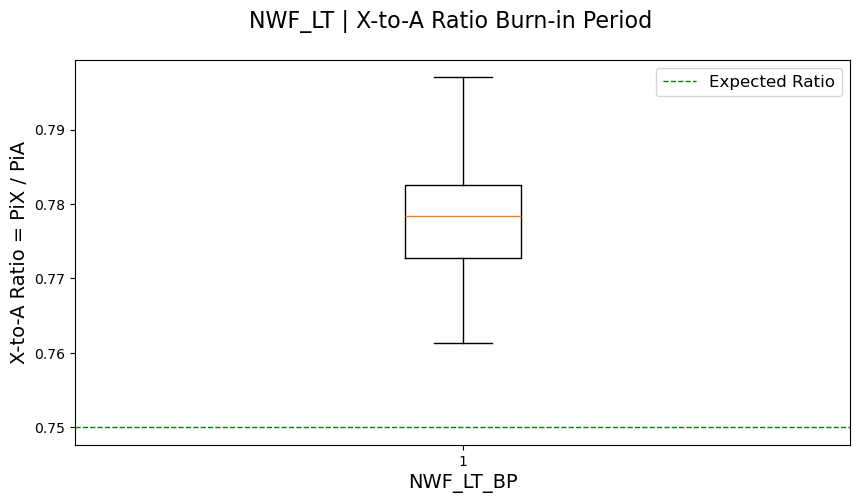

In [8]:
#Number of Migrants = 1

import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Hybridization/1SLiM_File/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Hybridization/"

TSEP = [0,5000,10000,15000,20000,25000,30000]
#TSEP = [20000]
nmig = 100

counter = 0
tBin = 60000

expected_ratio = 0.8296
SR = 0.5
Ne = 4*750*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
expected_teta = round (4*Ne*40*1.25e-8,10)


L_XtoA = []

for tsep in TSEP:

    for NUM in range(1,21):

        XtoA = []
        File = FOLDER + f"NWFLT_Hyb_Pi_OM{tsep},{nmig},{NUM}.txt"
        if os.path.isfile(File):
            with open(File, 'r', encoding='utf-8') as Text:
                for ligne in Text:
                    Values = ligne.strip().split()
                    if len(Values) > 1:
                        try:
                            XtoA.append(float(Values[1]) / float(Values[0]))
                        except (ValueError, ZeroDivisionError):
                            pass  # ou afficher un message d'erreur si tu veux
        L_XtoA .append(XtoA)

BP = int(60000/500-1)
L_XtoA_BP = []
for el in L_XtoA:
    if len(el) > BP:
        L_XtoA_BP.append(el[BP])      
BP_Ratio_mean = np.mean(L_XtoA_BP)
print(BP_Ratio_mean)

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle(f"NWF_LT | X-to-A Ratio Burn-in Period", fontsize=16)

ax.boxplot([L_XtoA_BP])
ax.set_xlabel("NWF_LT_BP", fontsize=14)
ax.set_ylabel("X-to-A Ratio = PiX / PiA", fontsize=14)
ax.axhline(y=0.75, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
#ax.set_xlim([min(Steps), max(Steps)])
#ax.set_ylim([0.72,0.835])
ax.legend(fontsize=12)
#fig.savefig(FOLDER_output+f'Hyb_NEW_OM_{tsep}_{nmig}.png') 

mp.show()
          